In [1]:
import pandas as pd
from pandas import DataFrame

try:
# Carica il tuo file XLSX
    xlsx_file = 'dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)


    Porosity_Tot    SSA_Tot  Conn.Dens.  Porosity     SSA      Ech  \
0          0.205  45.892683     310.913     0.137   5.065  -25.849   
1          0.205  45.892683     310.913     0.147   5.253  -31.002   
2          0.205  45.892683     310.913     0.131   4.697  -20.047   
3          0.176  54.744318     350.137     0.115   5.583  -50.613   
4          0.176  54.744318     350.137     0.139   7.447 -136.737   
5          0.176  54.744318     350.137     0.115   5.311  -32.907   
6          0.184  53.413043     368.141     0.134   6.990 -115.218   
7          0.184  53.413043     368.141     0.138   7.132 -110.411   
8          0.184  53.413043     368.141     0.116   5.290  -39.748   
9          0.020  45.650000      10.573     0.020   0.791   -3.948   
10         0.020  45.650000      10.573     0.020   0.806   -2.017   
11         0.274  36.324818     458.436     0.273   7.721 -102.424   
12         0.274  36.324818     458.436     0.250   6.870  -76.478   
13         0.274  36

In [2]:
df.columns

Index(['Porosity_Tot', 'SSA_Tot', 'Conn.Dens.', 'Porosity', 'SSA', 'Ech',
       'Tortuosity', 'k_m2'],
      dtype='object')

In [3]:
#### voglio rimuoveretutti i valori = 0 della colonna k_m2
df = df[df.k_m2 != 0]
print(df)

    Porosity_Tot    SSA_Tot  Conn.Dens.  Porosity     SSA      Ech  \
0          0.205  45.892683     310.913     0.137   5.065  -25.849   
1          0.205  45.892683     310.913     0.147   5.253  -31.002   
2          0.205  45.892683     310.913     0.131   4.697  -20.047   
3          0.176  54.744318     350.137     0.115   5.583  -50.613   
4          0.176  54.744318     350.137     0.139   7.447 -136.737   
5          0.176  54.744318     350.137     0.115   5.311  -32.907   
6          0.184  53.413043     368.141     0.134   6.990 -115.218   
7          0.184  53.413043     368.141     0.138   7.132 -110.411   
8          0.184  53.413043     368.141     0.116   5.290  -39.748   
9          0.020  45.650000      10.573     0.020   0.791   -3.948   
10         0.020  45.650000      10.573     0.020   0.806   -2.017   
11         0.274  36.324818     458.436     0.273   7.721 -102.424   
12         0.274  36.324818     458.436     0.250   6.870  -76.478   
13         0.274  36

In [4]:
import pandas as pd

# Lista delle colonne su cui eseguire la data augmentation
columns_to_mutate = ['Porosity_Tot', 'SSA_Tot', 'Conn.Dens.', 'Porosity', 'SSA', 'Ech', 'Tortuosity']

# Inizializza una lista per conservare i DataFrame mutati
dataframes = []

# Per ogni colonna, crea una copia del DataFrame con quella colonna impostata a zero
for col in columns_to_mutate:
    df_mutated = df.copy()
    df_mutated[col] = 0
    df_mutated['Database'] = col  # Aggiungi una colonna per identificare quale colonna è stata mutata
    dataframes.append(df_mutated)

# Concatenazione di tutti i DataFrame mutati in uno solo
data_augmented = pd.concat(dataframes, ignore_index=True)

# Se vuoi visualizzare il DataFrame risultante
print(data_augmented)


     Porosity_Tot    SSA_Tot  Conn.Dens.  Porosity    SSA      Ech  \
0           0.000  45.892683     310.913     0.137  5.065  -25.849   
1           0.000  45.892683     310.913     0.147  5.253  -31.002   
2           0.000  45.892683     310.913     0.131  4.697  -20.047   
3           0.000  54.744318     350.137     0.115  5.583  -50.613   
4           0.000  54.744318     350.137     0.139  7.447 -136.737   
..            ...        ...         ...       ...    ...      ...   
324         0.088  56.443182      68.701     0.076  4.240  -44.725   
325         0.088  56.443182      68.701     0.073  4.035  -39.278   
326         0.029  46.724138      17.118     0.026  1.209  -13.631   
327         0.050  58.180000      28.320     0.041  2.340  -18.740   
328         0.050  58.180000      28.320     0.042  2.434  -27.463   

     Tortuosity          k_m2      Database  
0         2.034  1.473350e-12  Porosity_Tot  
1         2.665  2.254724e-12  Porosity_Tot  
2         2.109  9.54

In [5]:
print(data_augmented.describe())

       Porosity_Tot     SSA_Tot  Conn.Dens.    Porosity         SSA  \
count    329.000000  329.000000  329.000000  329.000000  329.000000   
mean       0.121167   52.111060  231.861100    0.104444    5.290796   
std        0.084204   25.723975  174.288631    0.074854    3.118881   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        0.056000   36.324818   68.701000    0.062000    4.035000   
50%        0.116000   56.443182  288.192000    0.098000    5.414000   
75%        0.176000   74.030303  350.137000    0.137000    7.652000   
max        0.293000   89.214286  607.796000    0.297000   10.300000   

              Ech  Tortuosity          k_m2  
count  329.000000  329.000000  3.290000e+02  
mean   -91.364170    2.717805  8.913665e-12  
std     77.842912    1.372920  2.460645e-11  
min   -362.849000    0.000000  2.456179e-14  
25%   -152.126000    1.717000  3.021802e-13  
50%    -71.467000    3.087000  5.462786e-13  
75%    -25.849000    3.722500  1.45974

In [7]:
data_augmented.drop(['Database'], axis=1)

,Porosity_Tot,SSA_Tot,Conn.Dens.,Porosity,SSA,Ech,Tortuosity,k_m2
0,0.000,45.892683,310.913,0.137,5.065,-25.849,2.034,1.473350e-12
1,0.000,45.892683,310.913,0.147,5.253,-31.002,2.665,2.254724e-12
2,0.000,45.892683,310.913,0.131,4.697,-20.047,2.109,9.543177e-12
3,0.000,54.744318,350.137,0.115,5.583,-50.613,4.183,9.664920e-13
4,0.000,54.744318,350.137,0.139,7.447,-136.737,2.595,9.180783e-13
...,...,...,...,...,...,...,...,...
324,0.088,56.443182,68.701,0.076,4.240,-44.725,0.000,1.021321e-12
325,0.088,56.443182,68.701,0.073,4.035,-39.278,0.000,5.362540e-13
326,0.029,46.724138,17.118,0.026,1.209,-13.631,0.000,1.924009e-13
327,0.050,58.180000,28.320,0.041,2.340,-18.740,0.000,8.750106e-13


In [8]:
data_augmented.head(50)

,Porosity_Tot,SSA_Tot,Conn.Dens.,Porosity,SSA,Ech,Tortuosity,k_m2,Database
0,0.000,45.892683,310.913,0.137,5.065,-25.849,2.0340,1.473350e-12,Porosity_Tot
1,0.000,45.892683,310.913,0.147,5.253,-31.002,2.6650,2.254724e-12,Porosity_Tot
2,0.000,45.892683,310.913,0.131,4.697,-20.047,2.1090,9.543177e-12,Porosity_Tot
3,0.000,54.744318,350.137,0.115,5.583,-50.613,4.1830,9.664920e-13,Porosity_Tot
4,0.000,54.744318,350.137,0.139,7.447,-136.737,2.5950,9.180783e-13,Porosity_Tot
5,0.000,54.744318,350.137,0.115,5.311,-32.907,4.1010,1.435774e-12,Porosity_Tot
6,0.000,53.413043,368.141,0.134,6.990,-115.218,2.7740,4.010302e-13,Porosity_Tot
7,0.000,53.413043,368.141,0.138,7.132,-110.411,2.7790,3.937021e-12,Porosity_Tot
8,0.000,53.413043,368.141,0.116,5.290,-39.748,3.8680,1.933907e-12,Porosity_Tot
9,0.000,45.650000,10.573,0.020,0.791,-3.948,3.1000,3.021802e-13,Porosity_Tot


In [24]:
#voglio resettare gli indici di df 
df.reset_index(drop=True, inplace=True)

In [25]:
df['k_m2']

0     1.473350e-12
1     2.254724e-12
2     9.543177e-12
3     9.664920e-13
4     9.180783e-13
5     1.435774e-12
6     4.010302e-13
7     3.937021e-12
8     1.933907e-12
9     3.021802e-13
10    3.190436e-13
11    5.516051e-11
12    3.822390e-11
13    5.275967e-11
14    2.009570e-11
15    1.319490e-10
16    8.289540e-11
17    3.390944e-13
18    2.066877e-13
19    3.390944e-13
20    2.066877e-13
21    5.531944e-13
22    2.456179e-14
23    7.811227e-13
24    1.235315e-12
25    5.429843e-13
26    2.933715e-13
27    4.255505e-13
28    7.133022e-13
29    2.933715e-13
30    4.255505e-13
31    7.133022e-13
32    1.767209e-13
33    2.211503e-13
34    1.739540e-13
35    5.697167e-13
36    3.235189e-13
37    8.485641e-14
38    4.966167e-13
39    1.459741e-12
40    5.462786e-13
41    2.564176e-13
42    1.021321e-12
43    5.362540e-13
44    1.924009e-13
45    8.750106e-13
46    3.461632e-13
Name: k_m2, dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from numpy import real

# Seleziona le colonne da scalare (tutte eccetto 'k_m2')
columns_to_scale = df.columns.difference(['k_m2'])

#Standardizza i dati con lo scaler
scaler = MinMaxScaler()  

# Standardizza solo le colonne selezionate
scaled_data = scaler.fit_transform(df[columns_to_scale])

# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Riaggiungi la colonna 'k_m2' al DataFrame scalato
df_scaled['k_m2'] = df['k_m2']

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)

DataFrame scalato:
    Conn.Dens.       Ech  Porosity  Porosity_Tot       SSA   SSA_Tot  \
0     0.502894  0.933953  0.422383      0.677656  0.449469  0.209479   
1     0.502894  0.919672  0.458484      0.677656  0.469240  0.209479   
2     0.502894  0.950032  0.400722      0.677656  0.410769  0.209479   
3     0.568572  0.865322  0.342960      0.571429  0.503944  0.371001   
4     0.568572  0.626641  0.429603      0.571429  0.699968  0.371001   
5     0.568572  0.914392  0.342960      0.571429  0.475339  0.371001   
6     0.598718  0.686278  0.411552      0.600733  0.651909  0.346708   
7     0.598718  0.699600  0.425993      0.600733  0.666842  0.346708   
8     0.598718  0.895433  0.346570      0.600733  0.473131  0.346708   
9     0.000000  0.994648  0.000000      0.000000  0.000000  0.205050   
10    0.000000  1.000000  0.000000      0.000000  0.001577  0.205050   
11    0.749909  0.721735  0.913357      0.930403  0.728783  0.034887   
12    0.749909  0.793641  0.830325      0.930

In [29]:
#Snippet per comprendere quale modello è più performante con i miei dati

from sklearn.model_selection import train_test_split

# Suddivisione del dataset in set di addestramento e test
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import time
from tqdm import tqdm

# In questo esempio, consideriamo k sia la colonna target
features_X = df_scaled.drop(['k_m2'], axis=1)  # Colonne features
targets_X = df_scaled[['k_m2']]  # Colonne target

# Suddivisione del dataset in set di addestramento e test

X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.2, random_state=42)

# Lista degli algoritmi da testare
algorithms = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("SVR", SVR()),
    ("Gaussian Process Regressor", GaussianProcessRegressor()),
    ("MLP Regressor", MLPRegressor()),
    ("XGBoost Regressor", XGBRegressor()),
]

# Definisci un dizionario per raccogliere i risultati
results_dict = {
    "Model": [],
    "Training RMSE": [],
    "Training MSE": [],
    "Training R^2": [],
    "Test RMSE": [],
    "Test MSE": [],
    "Test R^2": [],
    "Training Time (s)": []
}

# Ciclo attraverso gli algoritmi e addestra/valuta ciascuno
for name, model in tqdm(algorithms, desc="Testing Algorithms"):
    
    # Misura il tempo di inizio dell'allenamento
    start_time = time.time()

    # Addestramento del modello
    model.fit(X_train, y_train)

    # Calcola il tempo di fine dell'allenamento
    end_time = time.time()
    
    # Calcola il tempo totale di addestramento
    training_time = end_time - start_time   

    # Valutazione del modello sui dati di addestramento
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = model.score(X_train, y_train)

    # Valutazione del modello sui dati di test
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = model.score(X_test, y_test)

    # Aggiungi i risultati al dizionario
    results_dict["Model"].append(name)
    results_dict["Training RMSE"].append(rmse_train)
    results_dict["Training MSE"].append(mse_train)
    results_dict["Training R^2"].append(r2_train)
    results_dict["Test RMSE"].append(rmse_test)
    results_dict["Test MSE"].append(mse_test)
    results_dict["Test R^2"].append(r2_test)
    results_dict["Training Time (s)"].append(training_time)

# Crea un DataFrame da results_dict
risultati_alle_mod_K = pd.DataFrame(results_dict)
# Esporta il DataFrame in un file Excel
risultati_alle_mod_K.to_excel('risultati_alle_mod_K.xlsx', index=False)

Testing Algorithms:   0%|          | 0/9 [00:00<?, ?it/s]C:\Users\abel9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\abel9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abel9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: 

In [31]:
y_test.shape

(10, 1)

In [34]:
y_test_pred.shape

(10,)

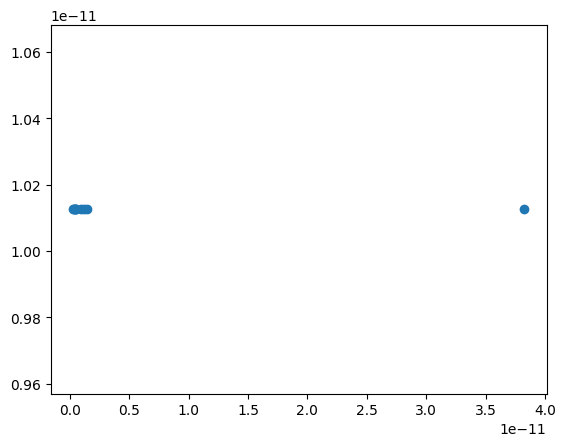

In [30]:
plt.scatter(y_test, y_test_pred)

R 2 : -0.24739399624858716


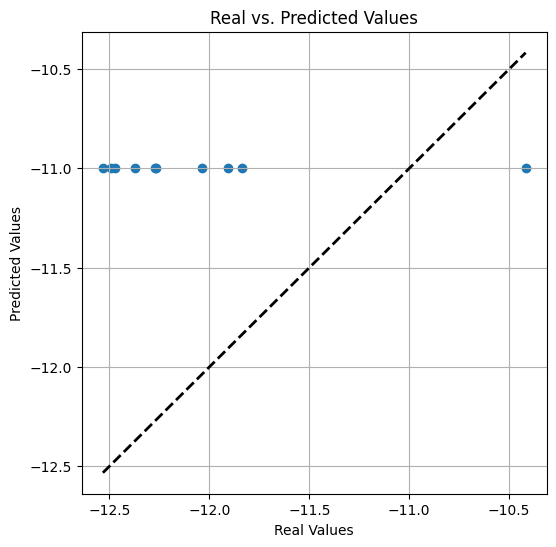

In [28]:
#Ora possiamo effettuare il primo allenamento grezzo con l'estimator che ha dato i risultati migliori

regressor =  RandomForestRegressor()
regressor.fit(X_train, y_train.values.ravel())
predict_k = regressor.predict(X_test)
print(f"R 2 : {regressor.score(X_test, y_test)}" )
mse_k = mean_squared_error(y_test, predict_k)

# Real vs. Predicted Values
plt.figure(figsize=(6, 6))
plt.scatter(np.log10(y_test), np.log10(predict_k))
# inserisci una linea bisettrice che rappresenta landamento ottimale dei valori
plt.plot([np.log10(y_test.min()),np.log10(y_test.max())], [np.log10(y_test.min()), np.log10(y_test.max())], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

(array([7., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.0020376 , 0.00778794, 0.01353829, 0.01928863, 0.02503897,
        0.03078931, 0.03653965, 0.04228999, 0.04804034, 0.05379068,
        0.05954102, 0.06529136, 0.0710417 , 0.07679204, 0.08254238,
        0.08829273, 0.09404307, 0.09979341, 0.10554375, 0.11129409,
        0.11704443, 0.12279477, 0.12854512, 0.13429546, 0.1400458 ,
        0.14579614, 0.15154648, 0.15729682, 0.16304717, 0.16879751,
        0.17454785, 0.18029819, 0.18604853, 0.19179887, 0.19754921,
        0.20329956, 0.2090499 , 0.21480024, 0.22055058, 0.22630092,
        0.23205126, 0.2378016 , 0.24355195, 0.24930229, 0.25505263,
        0.26080297, 0.26655331, 0.27230365, 0.27805399, 0.28380434,
        0.28955468]),
 <BarContainer object of 50 artists>)

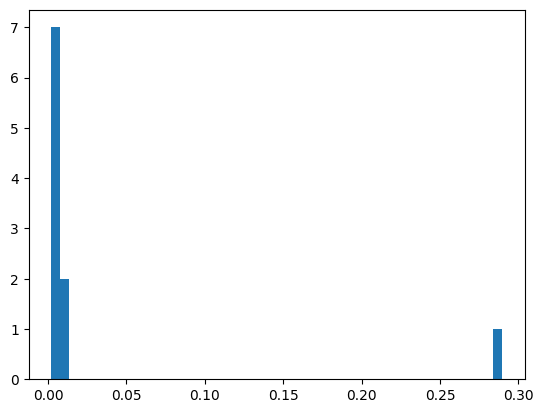

In [15]:
plt.hist(y_test, bins=50)

Valore reale: 0.0030395332619705916 - Valore predetto: 0.005863253545794477 
Errore di previsione 0.0028237202838238855 

Valore reale: 0.010878800982553432 - Valore predetto: 0.0036427688791238534 
Errore di previsione 0.007236032103429579 

Valore reale: 0.0020376033557647486 - Valore predetto: 0.002656949903151034 
Errore di previsione 0.0006193465473862854 

Valore reale: 0.0038786765738826586 - Valore predetto: 0.00469446846719598 
Errore di previsione 0.0008157918933133215 

Valore reale: 0.009177624892296711 - Valore predetto: 0.008921207990019176 
Errore di previsione 0.00025641690227753457 

Valore reale: 0.0022661234875121948 - Valore predetto: 0.0022973968964123317 
Errore di previsione 3.1273408900136905e-05 

Valore reale: 0.2895546778662239 - Valore predetto: 0.3150371555228631 
Errore di previsione 0.02548247765663919 

Valore reale: 0.002384187208014402 - Valore predetto: 0.0019251063927941661 
Errore di previsione 0.0004590808152202359 

Valore reale: 0.006772941542424

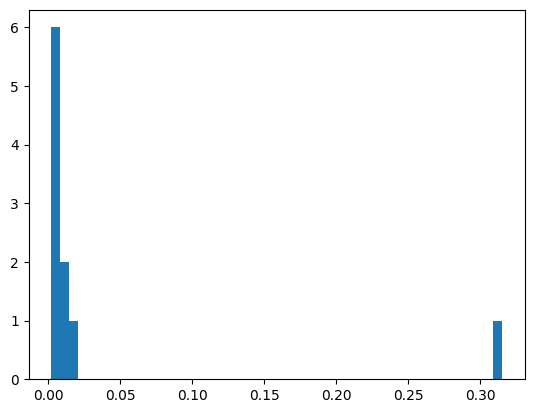

In [17]:
plt.hist(predict_k, bins=50)

y_ravel = y_test.values.ravel()

errori_list = []

for a in range(0, len(y_test)):
    errori_list.append(abs(y_ravel[a] - predict_k[a]))
    print(f"Valore reale: {y_ravel[a]} - Valore predetto: {predict_k[a]} \n"
         f"Errore di previsione { abs(y_ravel[a] - predict_k[a]) } \n")

In [18]:
#visualizzo gli errori di previsione "non scalati" (con i veri valori)
 
errori_List = np.array(errori_list)
print("Dimensioni di errori_array:", errori_List.shape)

# De-standardizzazione dei residui
residui_originali = []

for i in range(len(errori_List)):
    residui_originali.append(
        errori_List[i] * (k2_max - k2_min) + k2_min
    )

print("\n\n---------\nResidui originali: \n", residui_originali)
# Ora residui_originali contiene i residui de-standardizzati


Dimensioni di errori_array: (10,)


---------
Residui originali: 
 [3.725870677302779e-13, 9.547872000154297e-13, 8.172215758107297e-14, 1.0764292453079946e-13, 3.383395383861841e-14, 4.126495030964165e-15, 3.362387444315885e-12, 6.057525448749491e-14, 1.3127435923025036e-12, 6.880559759378123e-13]


In [9]:
# In questa sezione devo verificare se il range di errore destandardizzato è accettabile
# L'errore può essere accettabile se non supera il range di un'ordine di grandezza

sentinella = 0
# Il rapporto che governerà questo range sarà il seguente:
# 0.7 < (y_test[i] / residui_originali[i]) < 1.3         -->     controllo del (+/-) 30% di errore
for i in range(len(y_test)):
    if 1.05 > (np.log10(y_ravel[i]) / np.log10(residui_originali[i])) > 0.95:
        print(f"Errore di previsione del dato {i} superiore al range ammissibile di un'ordine di grandezza")
        sentinella = 1

if sentinella == 0: 
    print("Tutti gli errori rientrano nel range di accettabilità")
        

Tutti gli errori rientrano nel range di accettabilità


In [10]:
#### test iperparametri più veloce...meno valori da provare....codice funzionante e veloce!!!

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time

# Definisci gli iperparametri da cercare
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [2, 3, 4, 8],
    'max_features': [0.1, 0.5, 1,2, 5],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Crea un oggetto GridSearchCV per la ricerca degli iperparametri con cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose = 1)
# Lista per tenere traccia del tempo di esecuzione di ciascun set di iperparametri
execution_times = []
# Definisci il tempo massimo di esecuzione in secondi (300 secondi = 5 minuti)
max_execution_time = 300
start_time = time.time()
# Esegui la ricerca degli iperparametri
grid_search.fit(X_train, y_train.values.ravel())

end_time = time.time()
training_time = end_time - start_time
# Trova il miglior modello
best_model = grid_search.best_estimator_
# Valuta il modello sul set di test
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_bestModel = best_model.score(X_test, y_test)

print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2_bestModel)
print("Training Time (seconds):", training_time)


Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Best Parameters: {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best MSE Score: 0.022042971295602606
Mean Squared Error: 4.138367851940311e-05
Root Mean Squared Error: 0.0064330147302336495
R^2 Score: 0.9917955799411946
Training Time (seconds): 305.6887848377228


[array([-0.00028864]), array([0.00055508]), array([-0.00122921]), array([0.00025376]), array([0.0001137]), array([-0.003266]), array([-0.00938834]), array([0.00049263]), array([-0.00865338]), array([-0.00514733]), array([-0.00480643]), array([-0.00618272]), array([-0.01727381]), array([0.00747793]), array([-0.00164846])]
--------------------


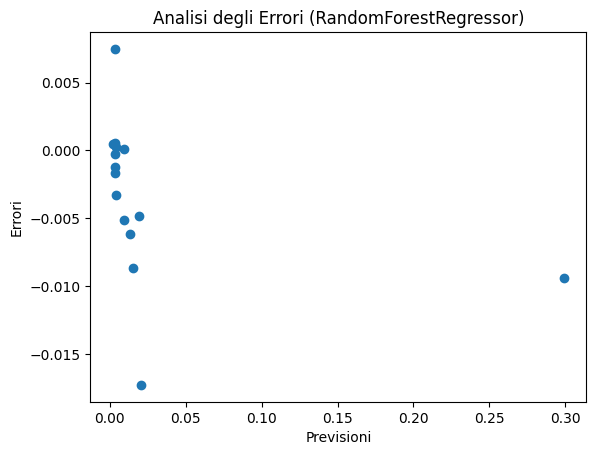

In [12]:
# Assicurati che siano array NumPy o serie Pandas
y_test = np.array(y_test)
predictions_rf = np.array(y_pred)
# Analisi degli errori
errore = []
for i in range(len(y_test)):
   errore.append(y_test[i] - predictions_rf[i])
print(errore)
print("--------------------")
# Supponendo che errore sia la tua lista di array
errore_concatenato = np.concatenate(errore)

# Creare un DataFrame pandas con una colonna chiamata 'Errore'
df_errore = pd.DataFrame({'Errore': errore_concatenato})

# Grafico degli errori
plt.scatter(predictions_rf, df_errore)
plt.xlabel('Previsioni')
plt.ylabel('Errori')
plt.title('Analisi degli Errori (RandomForestRegressor)')
plt.show()


In [15]:
#Codice che mi serve solo per controllare se l'allenamento procede correttamente.
#Devo controllare che gli errori non si discostino troppo dai valori reali
#Ora controllo dopo averlo allenato col modello migliore utilizzando gli iperparametri migliori

errorilist2 = []

for a in range(0, len(y_test)):
    errorilist2.append(abs(y_ravel[a] - y_pred[a]))
    print(f"Valore reale: {y_ravel[a]} - Valore predetto: {y_pred[a]} \n"
         f"Errore di previsione { abs(y_ravel[a] - y_pred[a]) } \n")
    
erroriList2 = np.array(errorilist2)

# De-standardizzazione dei residui
residui_originali_2 = []
print(y_test)
for i in range(len(erroriList2)):
    residui_originali_2.append(
        erroriList2[i] * (k2_max - k2_min) + k2_min
    )

print("Residui originali: \n", residui_originali_2)

Valore reale: 0.003225113566605279 - Valore predetto: 0.0035137536447346386 
Errore di previsione 0.0002886400781293595 

Valore reale: 0.004140073664825046 - Valore predetto: 0.0035849888028783848 
Errore di previsione 0.0005550848619466611 

Valore reale: 0.0022233701657458564 - Valore predetto: 0.003452582143083026 
Errore di previsione 0.0012292119773371695 

Valore reale: 0.004064100675260896 - Valore predetto: 0.0038103375904196767 
Errore di previsione 0.0002537630848412193 

Valore reale: 0.009362062615101288 - Valore predetto: 0.009248367394594016 
Errore di previsione 0.00011369522050727263 

Valore reale: 0.0006431000613873541 - Valore predetto: 0.003909099331657361 
Errore di previsione 0.0032659992702700072 

Valore reale: 0.2896869244935544 - Valore predetto: 0.29907525966120035 
Errore di previsione 0.009388335167645978 

Valore reale: 0.0025698895027624308 - Valore predetto: 0.0020772590064310568 
Errore di previsione 0.000492630496331374 

Valore reale: 0.0069578268876

In [22]:
# In questa sezione devo verificare se il range di errore destandardizzato è accettabile
# L'errore può essere accettabile se non supera il range di un'ordine di grandezza

sentinella = 0
# Il rapporto che governerà questo range sarà il seguente:
# 0.7 < (y_test[i] / residui_originali[i]) < 1.3         -->     controllo del (+/-) 30% di errore
for i in range(len(y_test)):
    if 1.000000000000001 > (np.log10(y_ravel[i]) / np.log10(residui_originali_2[i])) > 0.999999999999:
        print(f"Errore di previsione del dato {i} superiore al range ammissibile di un'ordine di grandezza")
        sentinella = 1

if sentinella == 0: 
    print("Tutti gli errori rientrano nel range di accettabilità")

Tutti gli errori rientrano nel range di accettabilità


Media MSE sulla LOOCV: 0.011237202240412325


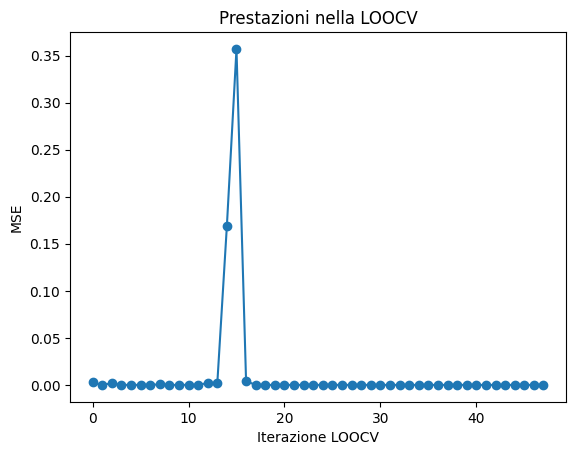

In [48]:
#Eseguo una cross validation per verificare se il modello è robusto con la tecnica LOOCV

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import numpy as np

# Inizializza lo schema LOOCV
loo = LeaveOneOut()

# Inizializza un array per tenere traccia delle prestazioni
performance = []

# Ciclo attraverso le iterazioni della LOOCV
for train_index, test_index in loo.split(df_scaled):
    X_train, X_test = df_scaled.drop('k_m2', axis=1).iloc[train_index], df_scaled.drop('k_m2', axis=1).iloc[test_index]
    y_train, y_test = df_scaled['k_m2'].iloc[train_index], df_scaled['k_m2'].iloc[test_index]

    # Addestra il regressore
    best_model.fit(X_train, y_train)

    # Valuta le prestazioni sul set di test
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    performance.append(mse)

# Media degli errori quadratici medi ottenuti in ciascuna iterazione
media_performance = np.mean(performance)
print(f"Media MSE sulla LOOCV: {media_performance}")

# #Escludo i valori con la varianza maggiore di de
# performance_senza_outlier = []
# 
# for valore in performance:
#     if valore <= 0.05:
#         performance_senza_outlier.append(valore)

# Plot delle prestazioni in ciascuna iterazione
plt.plot(performance, marker='o')
plt.xlabel('Iterazione LOOCV')
plt.ylabel('MSE')
plt.title('Prestazioni nella LOOCV')
plt.show()

Plot per la soglia 0.05


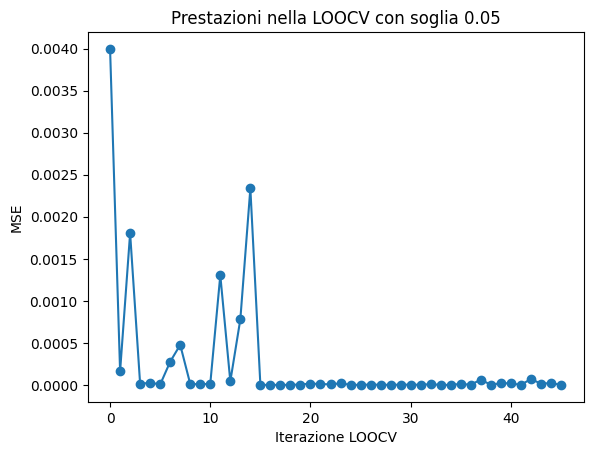

Plot per la soglia 0.003


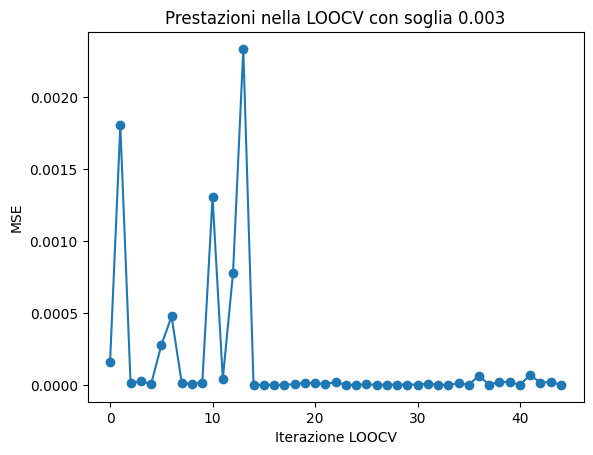

Plot per la soglia 0.0013


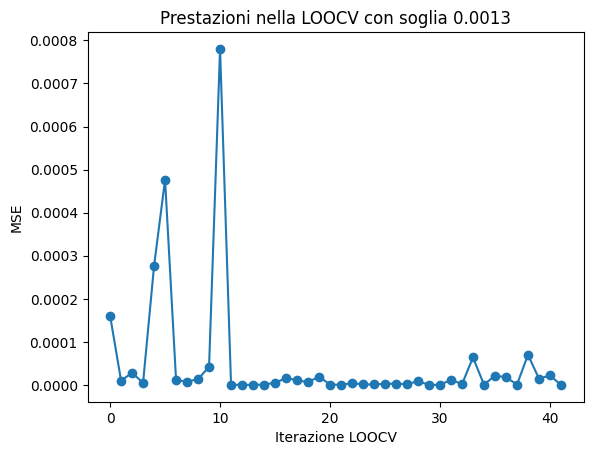

Plot per la soglia 0.000213


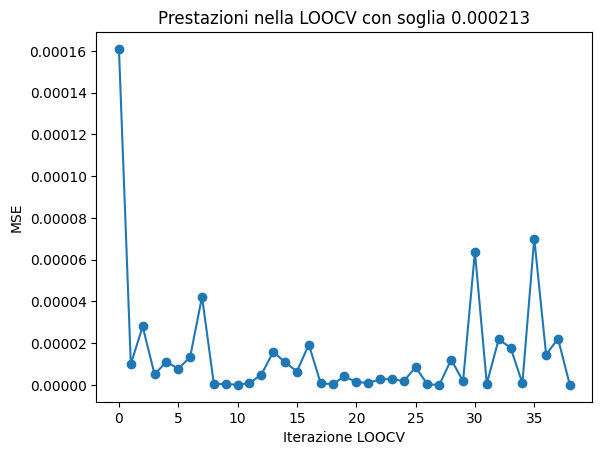

Plot per la soglia 6e-05


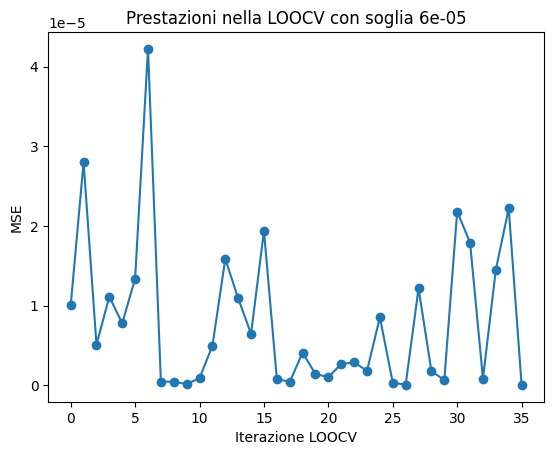

Plot per la soglia 3e-05


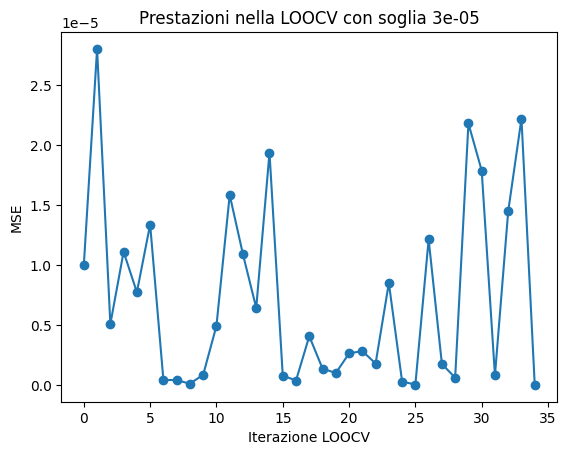

In [46]:
#Ho identificato alcune soglie con il quale è possibile visualizzare meglio le performance dell'algoritmo LOO
# Per fare ciò però ogni volta è necessario eliminare i valori al di sopra di quelle soglie. Verranno provate multiple visualizzazione in modo da non 
# perdere nessun valore utile

soglie = [0.05, 0.003, 0.0013, 0.000213, 0.00006, 0.00003]

# Ciclo attraverso le soglie
for soglia in soglie:
    # Riinizializza l'array ad ogni iterazione
    performance_senza_outlier = []

    # Filtra gli outlier in base alla soglia corrente
    for valore in performance:
        if valore <= soglia:
            performance_senza_outlier.append(valore)

    # Stampa e plotta le prestazioni senza outlier
    print(f"Plot per la soglia {soglia}")
    plt.plot(performance_senza_outlier, marker='o')
    plt.xlabel('Iterazione LOOCV')
    plt.ylabel('MSE')
    plt.title(f'Prestazioni nella LOOCV con soglia {soglia}')
    plt.show()

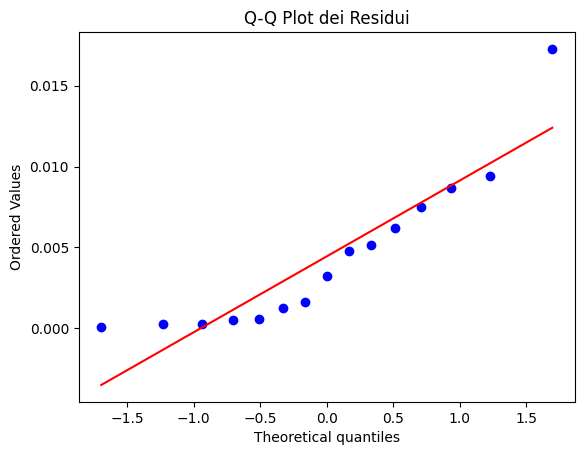

In [28]:
# ANALISI DEI RESIDUI

#QQ plot
from scipy import stats

stats.probplot(erroriList2, plot=plt)
plt.title('Q-Q Plot dei Residui')
plt.show()


In [17]:
# salvare il modello allenato di XGBoost
import pickle

# Salva il modello su disco
with open('RandomForestRegressor_Permeability.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Modello salvato come 'RandomForestRegressor_Permeability.pkl'")
##################################################################

# Carica il modello salvato
import pickle
with open('RandomForestRegressor_Permeability.pkl', 'rb') as model_file:
    loaded_model_RFR_Perm = pickle.load(model_file)

Modello salvato come 'RandomForestRegressor_Permeability.pkl'
